In [1]:
import numpy as np
import pandas as pd

In [2]:
trans = pd.DataFrame({'A':[12, 4, 5, None, 1],
                    'B':[7, 2, 54, 3, None],
                    'C':[20, 16, 11, 3, 8],
                    'D':[14, 3, None, 2, 6]},
                    index=['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5'])
trans

,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [3]:
result = trans.transform(lambda x:x+10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [4]:
result2 = trans.transform([np.sqrt, np.exp])
result2

A                        B                       C  \
           sqrt            exp      sqrt           exp      sqrt   
Row_1  3.464102  162754.791419  2.645751  1.096633e+03  4.472136   
Row_2  2.000000      54.598150  1.414214  7.389056e+00  4.000000   
Row_3  2.236068     148.413159  7.348469  2.830753e+23  3.316625   
Row_4       NaN            NaN  1.732051  2.008554e+01  1.732051   
Row_5  1.000000       2.718282       NaN           NaN  2.828427   

                            D                
                exp      sqrt           exp  
Row_1  4.851652e+08  3.741657  1.202604e+06  
Row_2  8.886111e+06  1.732051  2.008554e+01  
Row_3  5.987414e+04       NaN           NaN  
Row_4  2.008554e+01  1.414214  7.389056e+00  
Row_5  2.980958e+03  2.449490  4.034288e+02

In [5]:
# 10 random numbers from 10-200
x = np.random.randint(10, 200, size=10)
x

array([103,  59,  35,  79,  37,  13,  48, 180,  15, 147])

In [7]:
np.digitize(x, bins=[50])

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [8]:
np.digitize(x, bins=[50, 100])

array([2, 1, 0, 1, 0, 0, 0, 2, 0, 2], dtype=int64)

In [9]:
df = pd.DataFrame({'height': x})
df

,height
0,103
1,59
2,35
3,79
4,37
5,13
6,48
7,180
8,15
9,147


In [10]:
df['binned'] = pd.cut(x=df['height'], bins=[0, 25, 50, 100, 200], labels=[1,2,3,4])
df

,height,binned
0,103,4
1,59,3
2,35,2
3,79,3
4,37,2
5,13,1
6,48,2
7,180,4
8,15,1
9,147,4


In [11]:
pd.qcut(df['height'], q=5)

0     (67.0, 111.8]
1      (43.6, 67.0]
2      (31.0, 43.6]
3     (67.0, 111.8]
4      (31.0, 43.6]
5    (12.999, 31.0]
6      (43.6, 67.0]
7    (111.8, 180.0]
8    (12.999, 31.0]
9    (111.8, 180.0]
Name: height, dtype: category
Categories (5, interval[float64]): [(12.999, 31.0] < (31.0, 43.6] < (43.6, 67.0] < (67.0, 111.8] < (111.8, 180.0]]

In [12]:
degrees = ['none', 'cum laude', 'magna cum laude', 'summa cum laude']
student_results = [3.93, 3.24, 2.8, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]
student_results.sort(reverse=True)

student_results_degress = pd.cut(student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees)
honor = pd.DataFrame({'grades': student_results, 'honors': student_results_degress})

honor

,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


<AxesSubplot:>

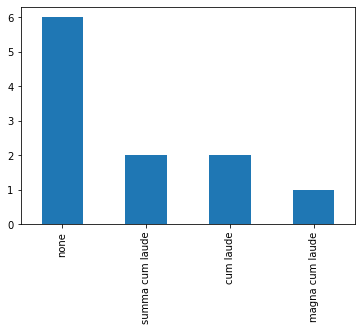

In [15]:
pd.value_counts(student_results_degress).plot.bar()